In [3]:
import pandas as pd
data = pd.read_csv('Customers.csv')

In [4]:
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
70,71,Male,70,49,55
157,158,Female,30,78,78
186,187,Female,54,101,24
194,195,Female,47,120,16
51,52,Male,33,42,60


In [5]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
26,28,32
36,34,17
128,71,11
38,37,26
134,73,5


In [6]:
data = data.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
data.sample(5)

,income,score
17,21,66
190,103,23
171,87,75
106,63,50
27,28,61


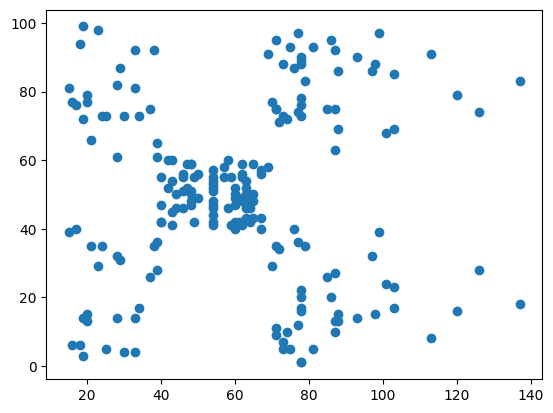

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data['income'], data['score'])


In [11]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

In [12]:
wcss_error

[269981.28,
 183714.08082173267,
 106348.37306211119,
 73880.64496247195,
 44454.47647967974,
 40830.14320219254,
 30259.65720728547,
 28578.602132730397,
 23966.86790377644,
 21057.083069309472]

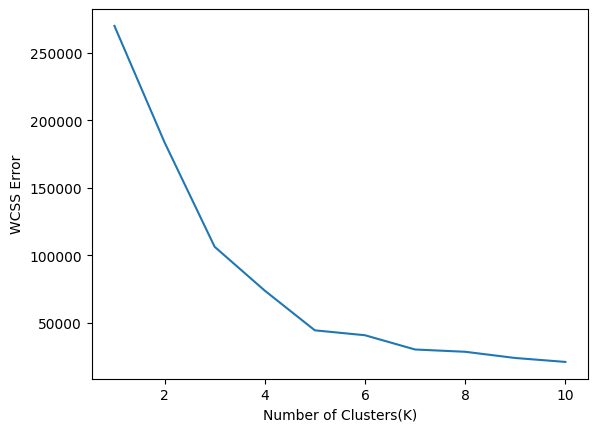

In [13]:
plt.xlabel('Number of Clusters(K)')
plt.ylabel('WCSS Error')
plt.plot(k_values, wcss_error)

#### According to above graph K = 5

In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5)
pred = model.fit_predict(data)


In [15]:
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [16]:
data.head(5)

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
data['cluster'] = pred

In [18]:
data.head(5)

,income,score,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [19]:
c1 = data[data['cluster'] == 0]
c1.head(5)

,income,score,cluster
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0


In [20]:
c1 = data[data['cluster'] == 0]
c2 = data[data['cluster'] == 1]
c3 = data[data['cluster'] == 2]
c4 = data[data['cluster'] == 3]
c5 = data[data['cluster'] == 4]


In [21]:
c4.head(5)

,income,score,cluster
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3


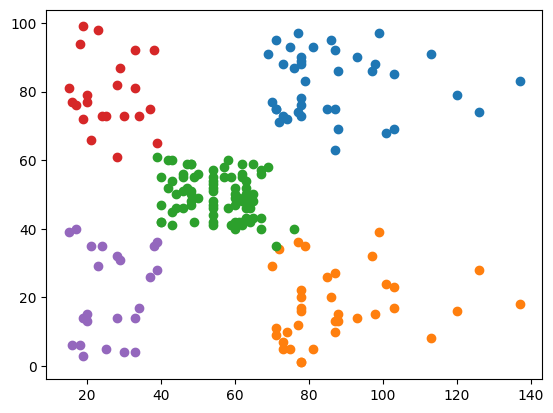

In [22]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])

In [23]:
model.cluster_centers_

array([[86.53846154, 82.12820513],
       [87.75      , 17.58333333],
       [55.0875    , 49.7125    ],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

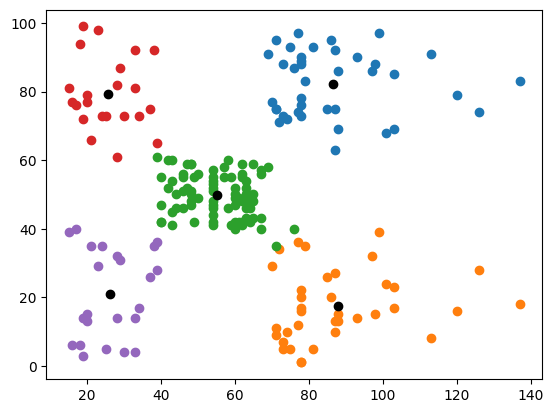

In [26]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color = 'black')